In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import math
import platform

# Import Audio
import pyaudio
import librosa
import soundfile

import numpy as np
import scipy
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg
import pyOssFilter

#############################################################################
#  Impulse Data Load & -------------------------------------------------------#
#############################################################################

str_fileinfo = '_mono_f32_44.1k'    # 파일명에 부가된 정보

# IMPULSE WAVE FILE
# wav_fname = "TyndallBruceMonument"
# wav_fname = "ElvedenHallMarbleHall'"
# wav_fname = "EmptyApartmentBedroom"
# wav_fname = "FalklandPalaceRoyalTennisCourt"
# wav_fname = "InsidePiano"
# wav_fname = "MaesHowe"
# wav_fname = "SportsCentreUniversityOfYork"
# wav_fname = "StairwayUniversityOfYork"
# wav_fname = "StAndrewsChurch"
wav_fname = "mh3_000_ortf_48k"
# wav_fname = "mh3_000_wx_48k"
# wav_fname = "anechoic_gunshot_0.44.1kHz.f32"
# wav_fname = "10s sweep for 3s reverb 48k"

dir_name = 'impulsefiles'

wav_fname= wav_fname + str_fileinfo

fname = pyOssWavfile.str_fname(dir_name, wav_fname) # 전체경로, 파일명 조합

fmt_w, data_w, st_fmt_w, t_w = pyOssWavfile.readf32(fname)
print(t_w)

if t_w < 3.0:
    t_temp = 3.0 - t_w
    data = pyOssWavfile.insertSilence(data_w, st_fmt_w.fs, t_temp)
    print(data.shape[0]/st_fmt_w.fs)


1.0
3.0


0.032063492063492065


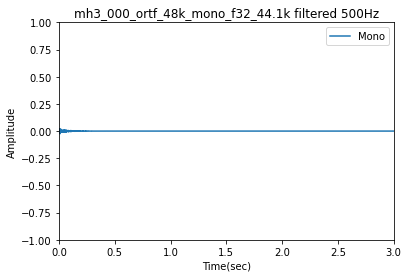

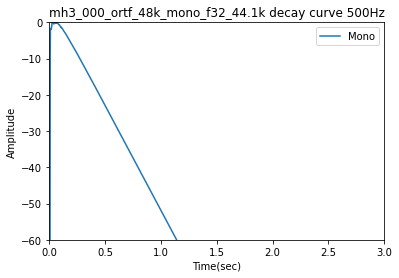

Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.201]]
T20= [[0.352]]
T30= [[0.524]]
RT60(from T30*2)= [[1.048]]
EDT= [[1.206]]
D50= 0.7231295286510757
C50= 4.169394560475946
C80= 8.85061046830867
Start   0dB= 8042
Start -10dB= 12069
Start -20dB= 19806
Start -30dB= 27439


In [2]:
###############################################################################
# Filter
###############################################################################

fc = 500        # Center freq for bandpass filter 500Hz

data_filt, decay, a_param, c_param = pyOssFilter.calc_filt_impulse_learning(1, data, st_fmt_w.fs, fc, fname=wav_fname)




... <  1.6
0.032063492063492065
Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.233]]
T20= [[0.352]]
T30= [[0.524]]
RT60(from T30*2)= [[1.048]]
EDT= [[1.398]]
D50= 0.6931497866621961
C50= 3.539006643435818
C80= 8.557617635147295
Start   0dB= 8164
Start -10dB= 12196
Start -20dB= 19967
Start -30dB= 27602
2  :  1.048
       8042 12069 19806 27439
0.032063492063492065
Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.236]]
T20= [[0.354]]
T30= [[0.526]]
RT60(from T30*2)= [[1.052]]
EDT= [[1.416]]
D50= 0.6814592348323677
C50= 3.302748623297843
C80= 8.270675197697358
Start   0dB= 8283
Start -10dB= 12326
Start -20dB= 20136
Start -30dB= 27774
3  :  1.052
       8164 12196 19967 27602
0.032063492063492065
Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.237]]
T20= [[0.356]]
T30= [[0.527]]
RT60(from T30*2)= [[1.054]]
EDT= [

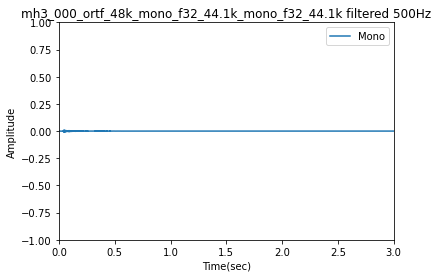

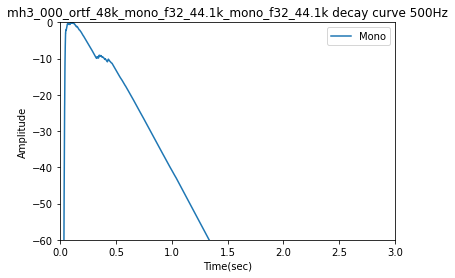

Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.247]]
T20= [[0.529]]
T30= [[0.672]]
RT60(from T30*2)= [[1.344]]
EDT= [[1.482]]
D50= 0.2812360884335988
C50= -4.075152145534288
C80= 0.7479833588352646
Start   0dB= 10249
Start -10dB= 17375
Start -20dB= 27785
Start -30dB= 35646
30  :  1.344
       10185 17311 27340 35213
0.032063492063492065
Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.248]]
T20= [[0.541]]
T30= [[0.682]]
RT60(from T30*2)= [[1.364]]
EDT= [[1.488]]
D50= 0.25351227547468963
C50= -4.690236770269463
C80= 0.5175257052071619
Start   0dB= 10312
Start -10dB= 17445
Start -20dB= 28271
Start -30dB= 36106
31  :  1.364
       10249 17375 27785 35646
0.032063492063492065
Impulse Name: mh3_000_ortf_48k_mono_f32_44.1k_mono_f32_44.1k, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.249]]
T20= [[0.556]]
T30= [[0.693]]
RT60(from T30*2)= [[1.386]]
EDT= [[1.494]]
D50= 0.20633

In [3]:
###############################################################################
#
###############################################################################
tgt_rt60 = 1.6      # sec
sample_tgt_rt60 = st_fmt_w.fs

k = 1
if a_param.RT60[0][0] > tgt_rt60:
    print("... > ", str(tgt_rt60))
    while a_param.RT60[0][0] > tgt_rt60:

        # data_w2 각 구간별 위치 구한 후 각 구각에 data_w*1.4, *1.2 *1 계산
        # 위치 찾기
        p_0dB = c_param.s_0dB
        p_10dB = c_param.s_10dB
        p_20dB = c_param.s_20dB
        p_30dB = c_param.s_30dB

        '''
        #case 1
        data_w_filtered = data_w_filtered * 0.8
        data_w = data_w_filtered

        if k == 26:
            draw_plot = True
        else:
            draw_plot = False

        data_w_filtered, decaycurve_w_filtered, acoustic_w_param, sample_w_dB_param  = \
            pyOssFilter.calc_filt_impulse_learning(draw_plot, data_w, st_fmt_w.fs, fc, filt_type='butt',fname=wav_fname + str_fileinfo)
        '''

        #case 2
        if p_10dB > p_0dB and p_30dB > 0:
            data_filt[0:p_10dB] = data_filt[0:p_10dB] * 0.9

            if p_20dB > p_10dB:
                data_filt[p_10dB:] = data_filt[p_10dB:] * 0.7

            data_temp = data_filt
            if k == 26:
                draw_plot = True
            else:
                draw_plot = False

            data_filt, decay, a_param, c_param  = \
                pyOssFilter.calc_filt_impulse_learning(draw_plot, data_temp, st_fmt_w.fs, fc, filt_type='butt',fname=wav_fname)

        '''
        #case 3
        if p_10dB > p_0dB and p_30dB > 0:
            data_w_filtered[0:p_10dB] = data_w_filtered[0:p_10dB] * 0.8

            if p_20dB > p_10dB:
                data_w_filtered[p_10dB:p_20dB] = data_w_filtered[p_10dB:p_20dB] * 0.5

            if p_30dB > p_20dB:
                data_w_filtered[p_20dB:p_30dB] = data_w_filtered[p_20dB:p_30dB] * 0.3

            data_w = data_w_filtered
            if k == 26:
                draw_plot = True
            else:
                draw_plot = False

            data_w_filtered, decaycurve_w_filtered, acoustic_w_param, sample_w_dB_param  = \
                pyOssFilter.calc_filt_impulse_learning(draw_plot, data_w, st_fmt_w.fs, fc, filt_type='butt',fname=wav_fname + str_fileinfo)
        '''

        if a_param.RT60[0][0] == 0.0 or k > 1000:
            break

        k = k + 1
        if k <= 50 or k % 50 == 0:
            print (k, " : ",  a_param.RT60[0][0])
            print ("      ",  p_0dB, p_10dB, p_20dB, p_30dB)

else:
    print("... < ", str(tgt_rt60))
    while a_param.RT60[0][0] < tgt_rt60:

        # data_w2 각 구간별 위치 구한 후 각 구각에 data_w*1.4, *1.2 *1 계산
        # 위치 찾기
        p_0dB = c_param.s_0dB
        p_10dB = c_param.s_10dB
        p_20dB = c_param.s_20dB
        p_30dB = c_param.s_30dB

        '''
        #case 1
        data_w_filtered = data_w_filtered * 1.2

        data_w = data_w_filtered

        if k == 50:
            draw_plot = True
        else:
            draw_plot = False

        data_w_filtered, decaycurve_w_filtered, acoustic_w_param, sample_w_dB_param  = \
            pyOssFilter.calc_filt_impulse_learning(draw_plot, data_w, st_fmt_w.fs, fc, filt_type='butt',fname=wav_fname + str_fileinfo)

        '''
        #case 2
        if p_10dB > p_0dB and p_30dB > 0:
            data_filt[0:p_10dB] = data_filt[0:p_10dB] * 1.0

            if p_20dB > p_10dB:
                data_filt[p_10dB:] = data_filt[p_10dB:] * 1.1

            data_temp = data_filt

            if k == 29:   
                draw_plot = True
            else:
                draw_plot = False


            data_filt, decay, a_param, c_param  = \
                pyOssFilter.calc_filt_impulse_learning(draw_plot, data_temp, st_fmt_w.fs, fc, filt_type='butt',fname=wav_fname + str_fileinfo)

        '''
        #case 3

        if p_10dB > p_0dB and p_30dB > 0:
            data_w_filtered[0:p_10dB] = data_w_filtered[0:p_10dB] * 1.1

            if p_20dB > p_10dB:
                data_w_filtered[p_10dB:p_20dB] = data_w_filtered[p_10dB:p_20dB] * 1.2

            if p_30dB > p_20dB:
                data_w_filtered[p_20dB:p_30dB] = data_w_filtered[p_20dB:p_30dB] * 1.5

            data_w = data_w_filtered

            if k == 26:
                draw_plot = True
            else:
                draw_plot = False

            data_w_filtered, decaycurve_w_filtered, acoustic_w_param, sample_w_dB_param  = \
                pyOssFilter.calc_filt_impulse_learning(draw_plot, data_w, st_fmt_w.fs, fc, filt_type='butt',fname=wav_fname + str_fileinfo)
        '''

        if a_param.RT60[0][0] == 0.0 or k > 1000:
            print("K IS ==== ", k)
            break

        k = k + 1
        if k <= 50 or k % 50 == 0:
            print (k, " : ",  a_param.RT60[0][0])
            print ("      ",  p_0dB, p_10dB, p_20dB, p_30dB)


print("=== Stop, k = ", k)
# print("2-1. acoustic_w_param = ", acoustic_w_param)
# print('1. inspect = ', inspect.getmembers(acoustic_w_param))
print('\n2-1. __dict__ = ', a_param.__dict__)
print('2-2. acoustic_w_param.RT60[0][0] = ', a_param.RT60[0][0])
print('\n2-3. __dict__ = ', c_param.__dict__)
print('2-4. sample_w_dB_param.s_0dB = ', c_param.s_0dB)
print('2-5. sample_w_dB_param.s_10dB = ', c_param.s_10dB)
print('2-6. sample_w_dB_param.s_20dB = ', c_param.s_20dB)
print('2-7. sample_w_dB_param.s_30dB = ', c_param.s_30dB)
